## Summary

<http://bestsel.elte.hu/>.

---

## Imports

In [1]:
import io
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import set_matplotlib_formats
from scipy import stats

In [2]:
set_matplotlib_formats("svg")

## Parameters

In [3]:
NOTEBOOK_DIR = Path("07_protein_analysis_bestsel")
NOTEBOOK_DIR.mkdir(exist_ok=True)

NOTEBOOK_DIR

PosixPath('07_protein_analysis_bestsel')

## xxx

In [11]:
"""\
SHC Adaptor Protein
Ubiquitin-like (UB roll)
Alpha-Beta Plaits
Cathepsin B; Chain A
OB fold (Dihydrolipoamide Acetyltransferase, E2P)
Mannose-Binding Protein A; Chain A
Uridine Diphospho-n-acetylenolpyruvylglucosamine Reductase; domain 3
Pdz3 Domain
Defensin A-like
Ubiquitin Conjugating Enzyme""".split("\n")

['SHC Adaptor Protein',
 'Ubiquitin-like (UB roll)',
 'Alpha-Beta Plaits',
 'Cathepsin B; Chain A',
 'OB fold (Dihydrolipoamide Acetyltransferase, E2P)',
 'Mannose-Binding Protein A; Chain A',
 'Uridine Diphospho-n-acetylenolpyruvylglucosamine Reductase; domain 3',
 'Pdz3 Domain',
 'Defensin A-like',
 'Ubiquitin Conjugating Enzyme']

In [12]:
pred = {
    "4beu_reference": {
        "fold": [
            "Roll",
            "2-Layer Sandwich",
            "4-Layer Sandwich",
            "Alpha-Beta Complex",
            "Sandwich",
            "Roll",
            "3-Layer(bba) Sandwich",
            "3-Layer(aba) Sandwich",
            "Beta Barrel",
            "Distorted Sandwich",
        ],
        "superfamily": [
            "Thiol Ester Dehydrase; Chain A",
            "Alpha-Beta Plaits",
            "2,3-Dihydroxybiphenyl 1,2-Dioxygenase; domain 1",
            "Peptide Deformylase",
            "Jelly Rolls",
            "SH3 type barrels.",
            "Deoxyribonuclease I; Chain A",
            "L-amino peptidase D-ALA esterase/amidase",
            "D-tyrosyl-trna(Tyr) Deacylase; Chain: A;",
            "Glutamine Phosphoribosylpyrophosphate, subunit 1, domain 1",
        ],
    },
    "4beu_design": {
        "fold": [
            "2-Layer Sandwich",
            "Roll",
            "Alpha-Beta Complex",
            "Beta Barrel",
            "Roll",
            "4-Layer Sandwich",
            "3-Layer(aba) Sandwich",
            "Sandwich",
            "Distorted Sandwich",
            "Single Sheet",
        ],
        "superfamily": [
            "SHC Adaptor Protein",
            "Ubiquitin-like (UB roll)",
            "Alpha-Beta Plaits",
            "Cathepsin B; Chain A",
            "OB fold (Dihydrolipoamide Acetyltransferase, E2P)",
            "Mannose-Binding Protein A; Chain A",
            "Uridine Diphospho-n-acetylenolpyruvylglucosamine Reductase; domain 3",
            "Pdz3 Domain",
            "Defensin A-like",
            "Ubiquitin Conjugating Enzyme",
        ],
    },
}

In [13]:
len(set(pred["4beu_reference"]["fold"]) & set(pred["4beu_design"]["fold"]))

8

In [14]:
len(set(pred["4beu_reference"]["superfamily"]) & set(pred["4beu_design"]["superfamily"]))

1

## Load data

In [4]:
DATA = {}

### Functions

In [5]:
def parse_data(data):
    buf = io.StringIO(data)
    df = pd.read_csv(
        buf,
        sep=" ",
        names="Factor Helix1 Helix2 Anti1 Anti2 Anti3 Para Turn Others NRMSD".split(" "),
    )

    # Convert percent to fraction
    data_columns = [c for c in df if c not in ["Factor", "NRMSD"]]
    df[data_columns] = df[data_columns].values / 100

    df["Name"] = df["Factor"].apply(lambda f: "reference" if f <= (len(df) // 2) else "design")
    df = df.drop("Factor", axis=1)
    df = df[["Name"] + [c for c in df if c not in ["Name"]]]
    return df

### 1n5u

In [6]:
DATA["1n5u"] = parse_data(
    """\
1.000 20.39 10.73 1.70 6.72 6.52 4.25 12.12 37.56 0.0127
2.000 19.07 10.58 0.88 3.88 10.88 2.69 14.23 37.79 0.0170
3.000 17.94 10.38 0.74 4.65 10.53 4.56 13.82 37.37 0.0157
4.000 19.00 11.65 0.00 6.79 7.64 4.44 12.91 37.57 0.0073
5.000 17.71 10.52 1.15 5.66 7.97 5.50 13.16 38.33 0.0135
6.000 19.43 11.34 0.00 6.32 9.06 4.22 12.76 36.87 0.0049
"""
)

DATA["4beu"] = parse_data(
    """\
1.000 10.26 5.83 6.48 12.25 9.75 4.28 12.72 38.42 0.0143
2.000 7.99 8.55 1.88 8.40 10.23 0.00 16.89 46.06 0.0150
"""
)

In [7]:
DATA["1n5u"]

,Name,Helix1,Helix2,Anti1,Anti2,Anti3,Para,Turn,Others,NRMSD
0,reference,0.2039,0.1073,0.0170,0.0672,0.0652,0.0425,0.1212,0.3756,0.0127
1,reference,0.1907,0.1058,0.0088,0.0388,0.1088,0.0269,0.1423,0.3779,0.0170
2,reference,0.1794,0.1038,0.0074,0.0465,0.1053,0.0456,0.1382,0.3737,0.0157
3,design,0.1900,0.1165,0.0000,0.0679,0.0764,0.0444,0.1291,0.3757,0.0073
4,design,0.1771,0.1052,0.0115,0.0566,0.0797,0.0550,0.1316,0.3833,0.0135
5,design,0.1943,0.1134,0.0000,0.0632,0.0906,0.0422,0.1276,0.3687,0.0049


In [8]:
DATA["4beu"]

,Name,Helix1,Helix2,Anti1,Anti2,Anti3,Para,Turn,Others,NRMSD
0,reference,0.1026,0.0583,0.0648,0.1225,0.0975,0.0428,0.1272,0.3842,0.0143
1,design,0.0799,0.0855,0.0188,0.0840,0.1023,0.0000,0.1689,0.4606,0.0150


## Create plot

In [9]:
cmap = plt.get_cmap("tab20c")
colors = [cmap(4), cmap(5), cmap(0), cmap(1), cmap(2), cmap(12), cmap(8)]

In [10]:
labels = {
    "Helix1": "Regular α-helix",
    "Helix2": "Distorted α-helix",
    "Anti1": "Left-twisted antip. β-strand",
    "Anti2": "Relaxed antip. β-strand",
    "Anti3": "Right-twisted antip. β-strand",
    "Para": "Parallel β-strand",
    "Turn": "Turn",
    "Others": "Others",
    #
    "1n5u": "Serum albumin (1n5u)",
    "4beu": "Alanine racemase (4beu)",
}

In [11]:
def plot_data(df, ax, group):
    df_reference = df[df["Name"] == "reference"]
    df_design = df[df["Name"] == "design"]

    x = np.array([0, 1])

    columns = [c for c in df if c not in ["Name", "NRMSD", "Others"]]
    for column_idx, column in enumerate(columns):
        color = colors[column_idx]

        mean = np.array([d[column].mean() for d in [df_reference, df_design]])
        sem = np.array([d[column].sem() for d in [df_reference, df_design]])

        if len(df_reference) > 1:
            pval = stats.ttest_ind(*[d[column].values for d in [df_reference, df_design]])
            assert pval.pvalue > 0.05

        ax.errorbar(
            x,
            mean,
            yerr=sem,
            capsize=3,
            marker=".",
            linewidth=1,
            elinewidth=2,
            markersize=10,
            alpha=0.8,
            color=color,
            label=labels[column],
        )

    ax.set_xlim(-0.5, 1.5)
    ax.set_xticks(x)
    ax.set_xticklabels([" reference", " design"], rotation="vertical")
    ax.set_xlabel(f"{labels[group]}")

    ax.set_ylim(-0.01, 0.21)
    ax.set_ylabel("Fraction")

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.grid(axis="y", linestyle=":")

    for tic in ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)

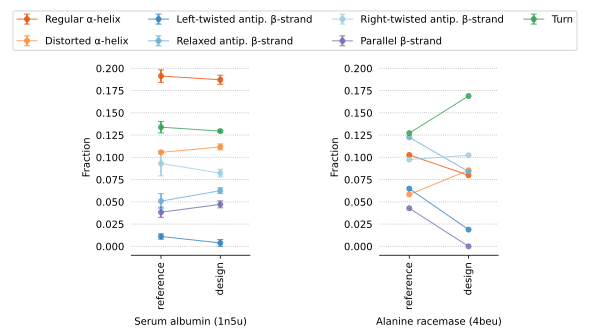

In [55]:
fig = plt.figure(constrained_layout=False, figsize=(8, 4.5))
gs = fig.add_gridspec(
    nrows=3,
    ncols=5,
    top=1,
    right=1,
    bottom=0,
    left=0,
    hspace=0.05,
    wspace=0.05,
    width_ratios=[3, 3, 3, 3, 2],
    height_ratios=[1.8, 7.5, 2.7],
)

axl = fig.add_subplot(gs[:1, :])
axl.axis("off")
axs = [fig.add_subplot(gs[1, 1]), fig.add_subplot(gs[1, 3])]

for group, ax in zip(DATA, axs):
    df = DATA[group]
    plot_data(df, ax, group)

axs[0].legend(
    loc="center", bbox_to_anchor=(0.5, 0.5), bbox_transform=axl.transAxes, labelspacing=1.2, ncol=4,
)

fig.savefig(NOTEBOOK_DIR.joinpath("reference-vs-design-secondary-structure-from-cd.pdf"))
fig.savefig(NOTEBOOK_DIR.joinpath("reference-vs-design-secondary-structure-from-cd.svg"))
fig.savefig(NOTEBOOK_DIR.joinpath("reference-vs-design-secondary-structure-from-cd.png"), dpi=300)

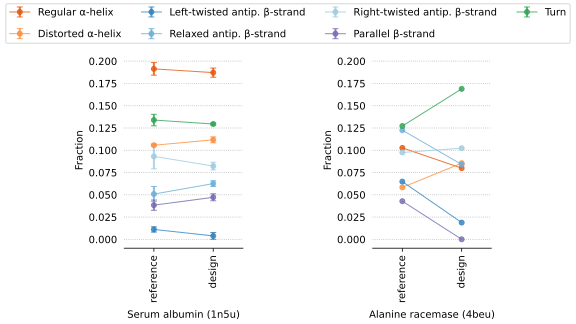

In [57]:
from IPython.display import SVG, Image

display(SVG("07_protein_analysis_bestsel/reference-vs-design-secondary-structure-from-cd.svg"))
# display(Image("07_protein_analysis_bestsel/reference-vs-design-secondary-structure-from-cd.png"))